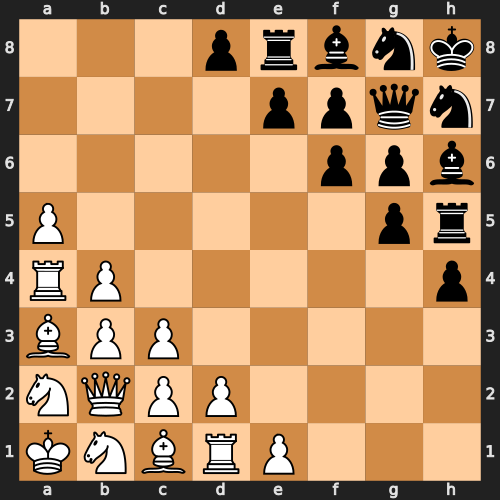

In [1]:
import chess_engine
from chess_engine.diagchess import get_legal_moves_mask 
import random
import matplotlib.pyplot as plt
import numpy as np

env = chess_engine.DiagonalChess()
env.reset()
env.render()

In [2]:
# import modelu
import tensorflow as tf

MODEL_NAMES = {
    "white-1": "../models/chess_white__selfplay_20230610-131319_1000.h5",
    "black-1": "../models/chess_black__selfplay_20230610-131319_1000.h5",
    "white-6": "../models/chess_white__selfplay_20230610-131319_6000.h5",
    "black-6": "../models/chess_black__selfplay_20230610-131319_6000.h5",
    "white-2-8": "../models/chess_white__selfplay_20230610-202156_13000.h5",
    "black-2-8": "../models/chess_black__selfplay_20230610-202156_13000.h5", 
}

class ChessAgent:
    def __init__(self, model_name):
        self.model = tf.keras.models.load_model(MODEL_NAMES[model_name])
    
    def action_probs(self, state, legal_actions):
        Q_values, critic = self.get_raw(state)
        Q_values = Q_values*legal_actions
        Q_values = Q_values/np.sum(Q_values)

        return Q_values, critic
    
    def get_raw(self, state):
        Q_values, critic = self.model.predict(state[np.newaxis], verbose=0) #type: ignore
        return Q_values[0], critic[0][0]

    def action(self, state, legal_actions):
        actions_prob, _ = self.action_probs(state, legal_actions)

        return np.argmax(actions_prob)
    
def legal_moves(board: chess_engine.DiagonalChess):
    return chess_engine.internal.get_legal_moves_mask(board.board, board.isBlack)

In [3]:
from tqdm.notebook import tqdm
N_GAME = 25

rewards_white = []
rewards_black = []
games_backtrace = []

ai_white = ChessAgent("white-2-8")
ai_black = ChessAgent("black-2-8")

t = tqdm(range(N_GAME))
for i in t:
    state = env.reset()
    reward_sum_white = 0
    reward_sum_black = 0 
    backtrace = []   
    for it in range(30):
        if env.isBlack:
            action = ai_black.action(state, legal_moves(env))
        else:
            action = ai_white.action(state, legal_moves(env))
        
        state, reward, done = env.step(int(action))

        backtrace.append((state, action, reward, done, env.render()))
        
        if env.isBlack:
            reward_sum_black += reward
        else:
            reward_sum_white += reward

        if done:
            break        

    avg_white = np.mean(rewards_white)
    avg_black = np.mean(rewards_black)
    t.set_description(f"White: {avg_white:.2f} Black: {avg_black:.2f}")
    
    rewards_white.append(reward_sum_white)
    rewards_black.append(reward_sum_black)

    games_backtrace.append(backtrace)

  0%|          | 0/50 [00:00<?, ?it/s]

c:\Users\Maciej\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Maciej\miniconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


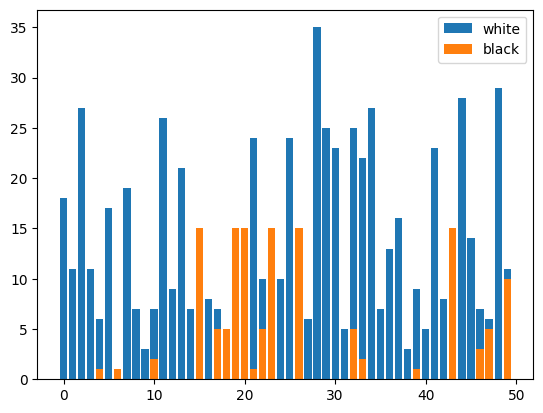

In [7]:
# show stats per game (bar)
if np.mean(rewards_white) > np.mean(rewards_black):
    plt.bar(range(N_GAME), rewards_white, label="white")
    plt.bar(range(N_GAME), rewards_black, label="black")
else:
    plt.bar(range(N_GAME), rewards_black, label="black")
    plt.bar(range(N_GAME), rewards_white, label="white")
plt.legend()
plt.show()


Game length: 30
White reward: 11
Black reward: 10
Action: 0, reward: 0, done: False


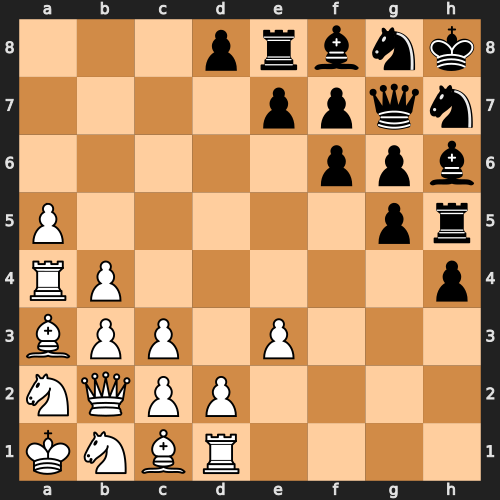

Action: 0, reward: 0, done: False


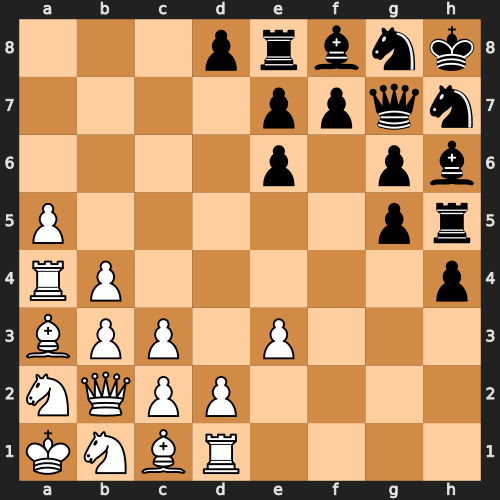

Action: 0, reward: 0, done: False


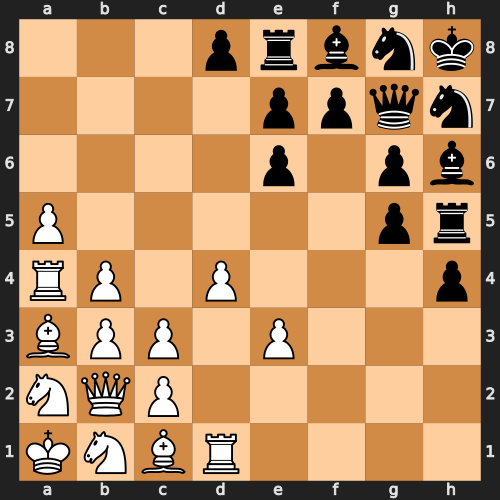

Action: 0, reward: 1, done: False


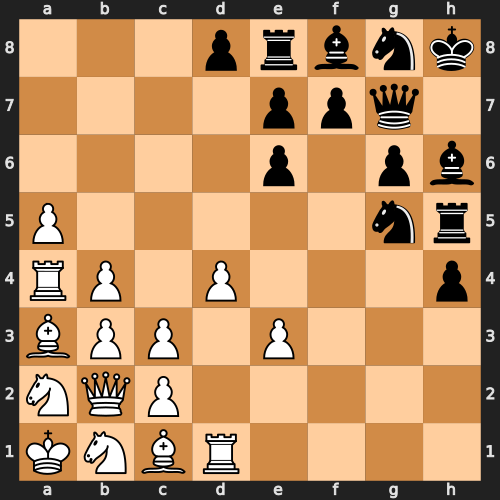

Action: 0, reward: 0, done: False


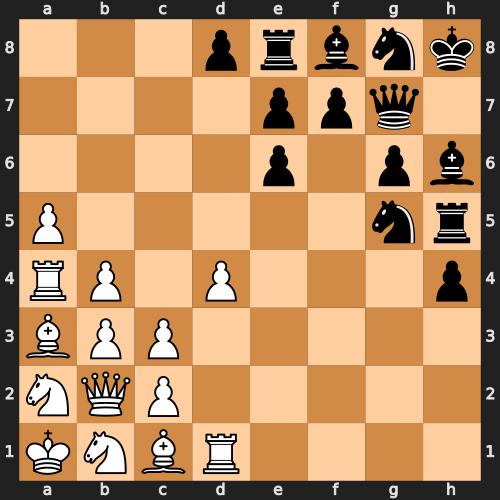

Action: 0, reward: 0, done: False


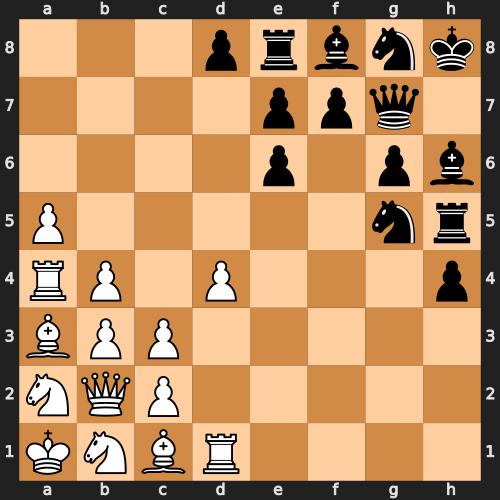

Action: 0, reward: 0, done: False


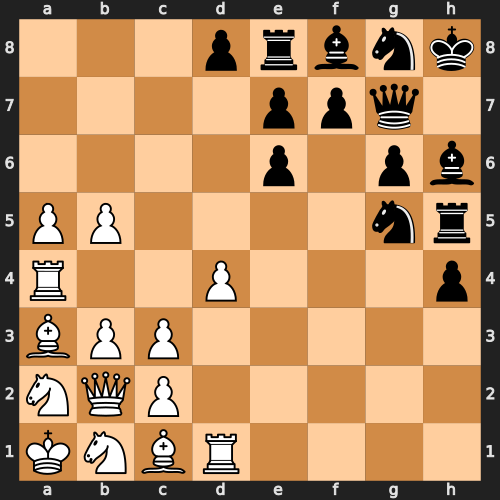

Action: 0, reward: 0, done: False


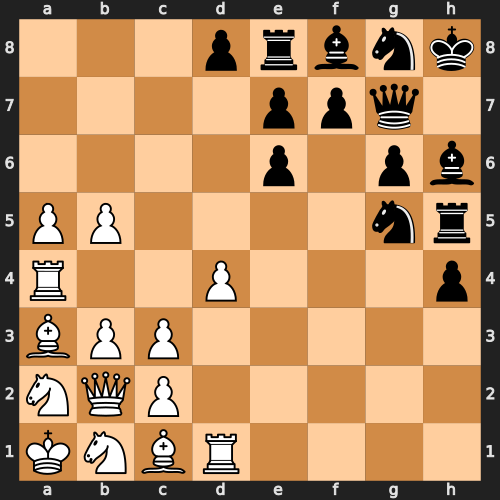

Action: 0, reward: 0, done: False


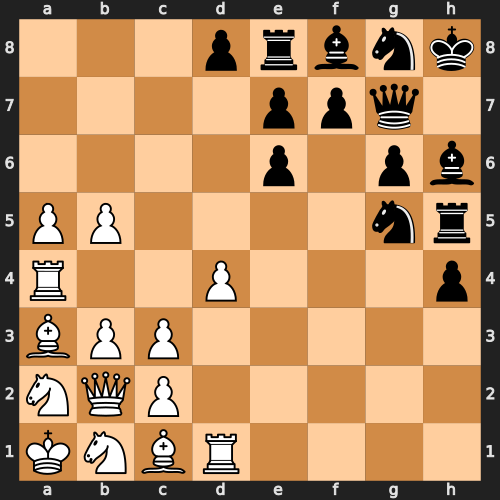

Action: 0, reward: 1, done: False


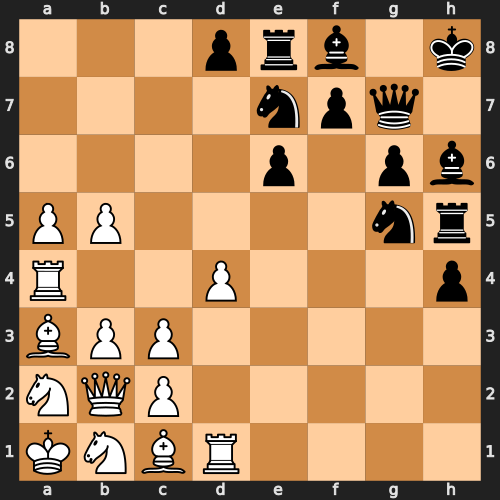

Action: 0, reward: 0, done: False


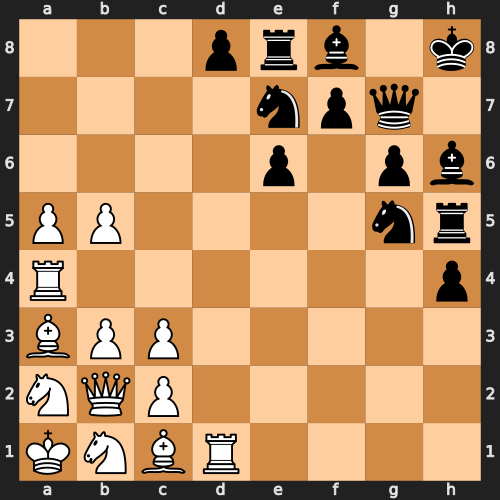

Action: 0, reward: 0, done: False


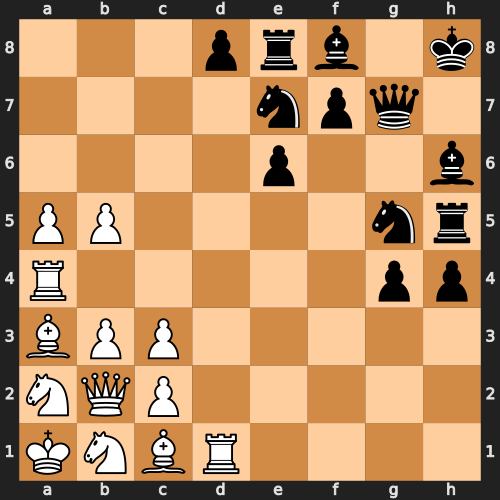

Action: 0, reward: 0, done: False


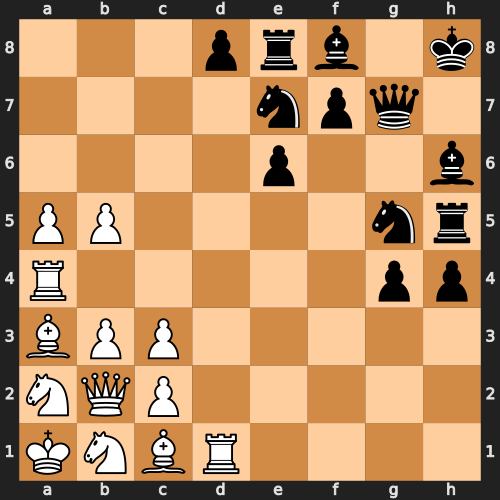

Action: 0, reward: 3, done: False


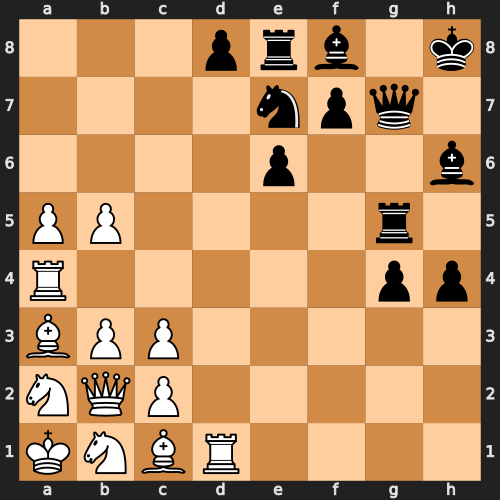

Action: 0, reward: 0, done: False


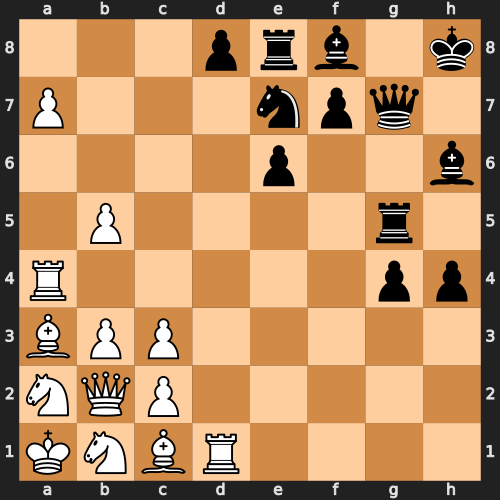

Action: 0, reward: 0, done: False


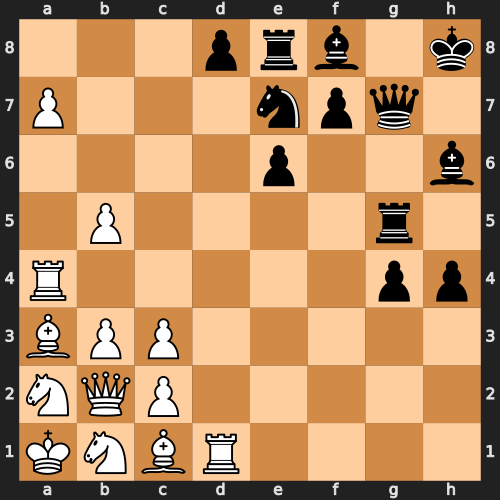

Action: 0, reward: 0, done: False


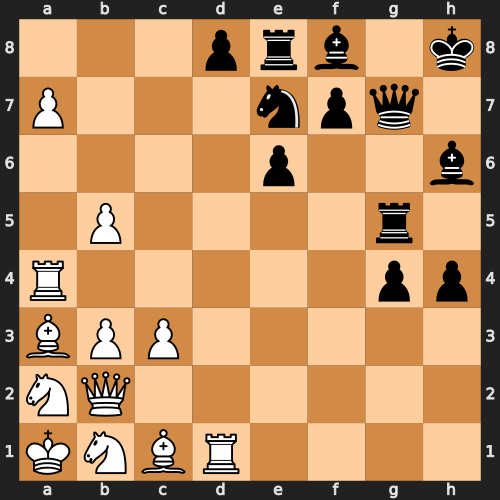

Action: 0, reward: 0, done: False


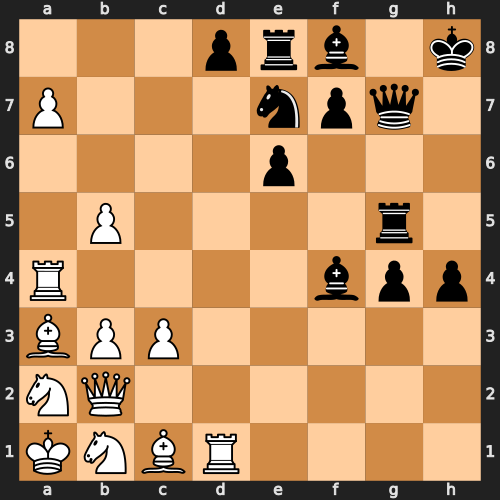

Action: 0, reward: 0, done: False


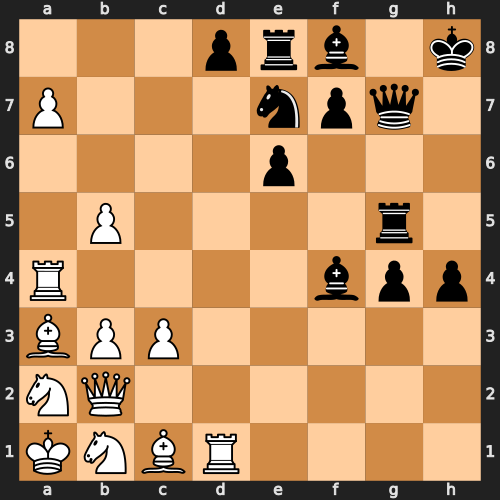

Action: 0, reward: 0, done: False


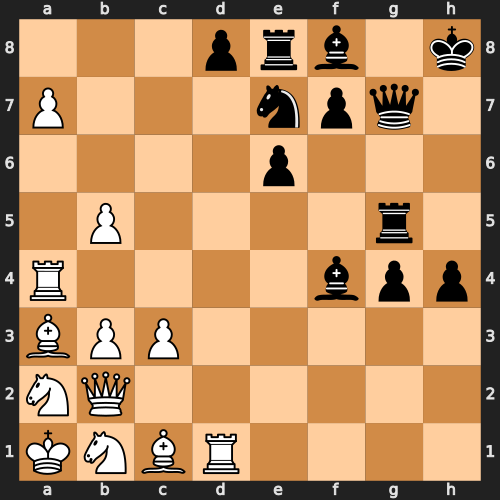

Action: 0, reward: 0, done: False


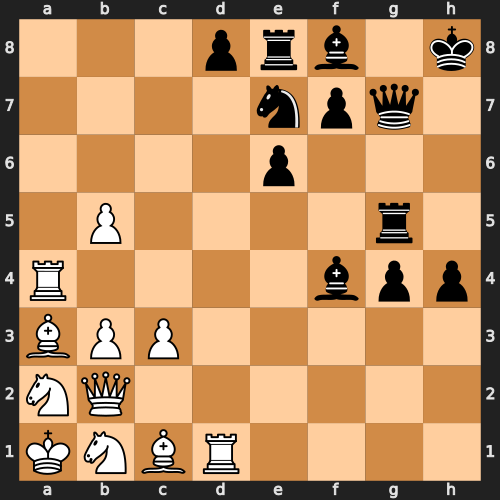

Action: 0, reward: 3, done: False


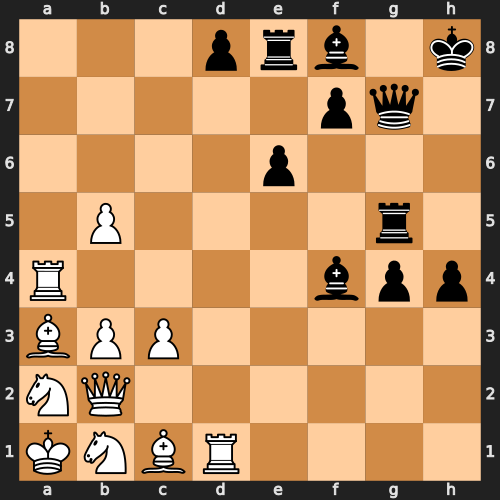

Action: 0, reward: 5, done: False


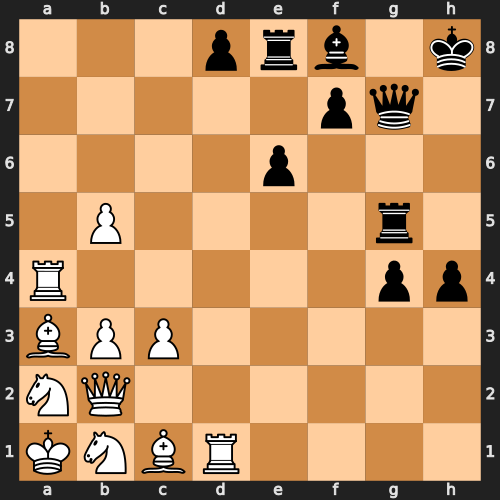

Action: 0, reward: 0, done: False


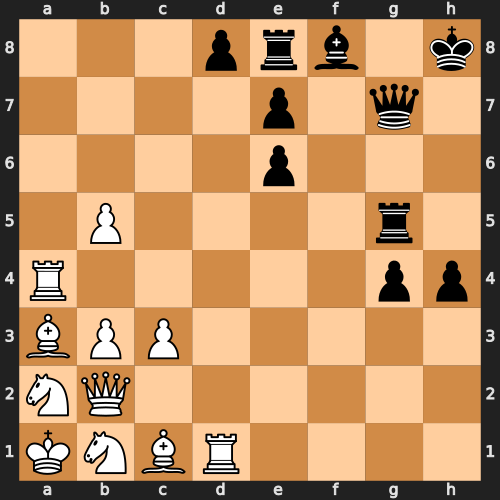

Action: 0, reward: 0, done: False


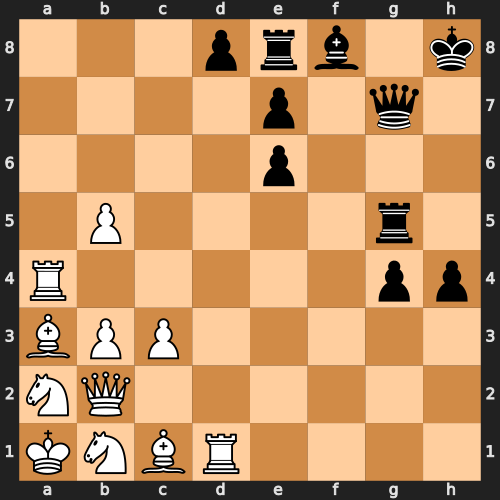

Action: 0, reward: 1, done: False


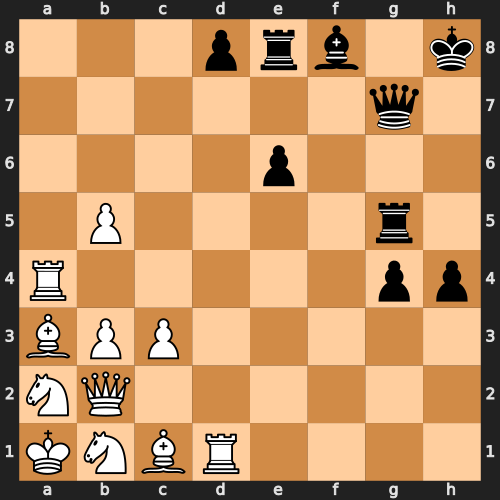

Action: 0, reward: 5, done: False


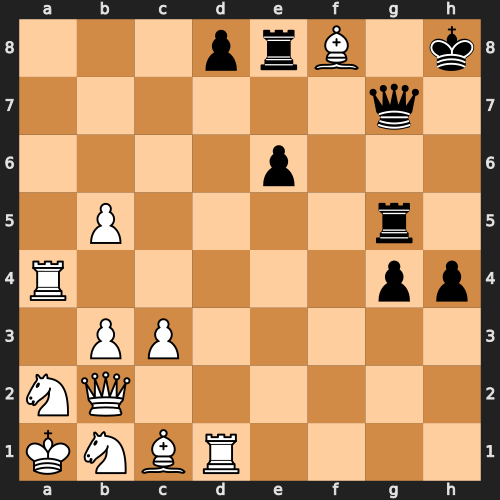

Action: 0, reward: 0, done: False


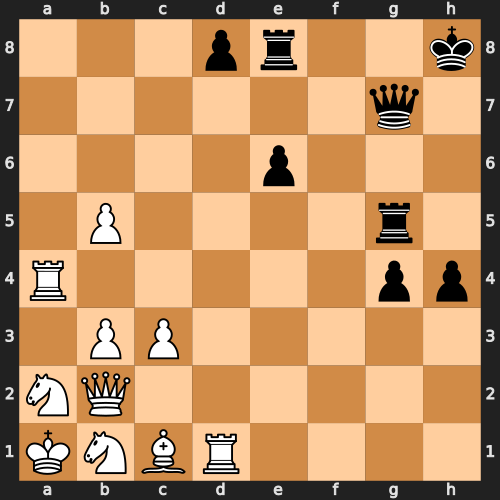

Action: 0, reward: 0, done: False


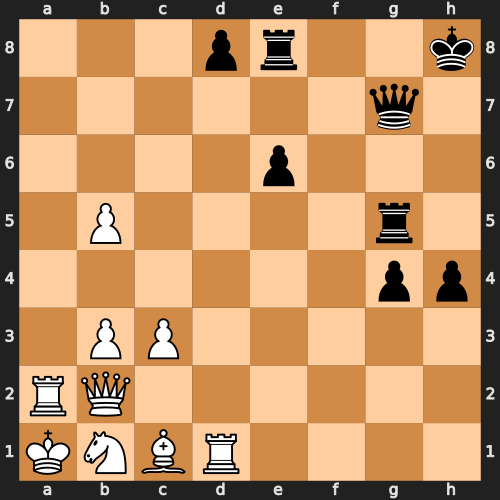

Action: 0, reward: 2, done: False


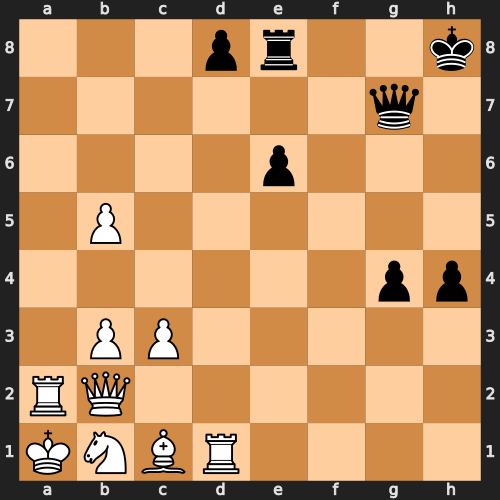

In [5]:
from IPython.display import display

# choose random game
idx = random.randint(0, len(games_backtrace))
game = games_backtrace[idx]

# print game stats
print(f"Game length: {len(game)}")
print(f"White reward: {rewards_white[idx]}")
print(f"Black reward: {rewards_black[idx]}")

for state, action, reward, done, svg in game:
    print(f"Action: {action}, reward: {reward}, done: {done}")
    display(svg)